In [27]:
# ! pip install opencv-python

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import cv2

from glob import glob
import os

In [29]:
# ! unzip captcha-samples-wordpress.zip > /dev/null

In [30]:
im = cv2.imread('train/22PL.png')
im.shape

(24, 72, 3)

In [31]:
im = 255 - cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)/255   # تبدیل مود رنگ
im.shape

(24, 72)

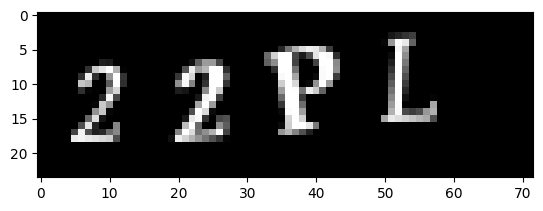

In [32]:
plt.imshow(im,'gray')

In [77]:
def load_data(p):
    pattern = os.path.join(p,'*.png')
    files = glob(pattern)
    X = []
    Y = []
    for file in files:
        chars = list(os.path.splitext(os.path.basename(file))[0])
        if len(chars) != 4:
            print(chars)
            continue
        im = cv2.imread(file)
        im = 255 - cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)/255  
        X.append(im)
        # Y.append(os.path.basename(file)[:-4])
        Y.append(chars)
    print(Y)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [79]:
x_train,y_train = load_data('train/')
x_test,y_test = load_data('test/')

['A', 'Z', 'Q', 'K', '(', '1', ')']
[['2', '2', '2', 'X'], ['2', '2', '6', 'U'], ['2', '2', '7', '4'], ['2', '2', 'A', '6'], ['2', '2', 'B', 'J'], ['2', '2', 'H', 'S'], ['2', '2', 'K', 'D'], ['2', '2', 'L', '9'], ['2', '2', 'N', 'R'], ['2', '2', 'P', 'L'], ['2', '2', 'S', 'S'], ['2', '2', 'U', 'X'], ['2', '3', 'D', '7'], ['2', '3', 'E', 'Z'], ['2', '3', 'F', 'Q'], ['2', '3', 'T', '2'], ['2', '3', 'X', 'T'], ['2', '4', '3', 'B'], ['2', '4', '8', 'C'], ['2', '4', 'F', 'J'], ['2', '4', 'F', 'K'], ['2', '4', 'H', 'A'], ['2', '4', 'H', 'K'], ['2', '4', 'X', 'X'], ['2', '4', 'Z', '5'], ['2', '4', 'Z', 'K'], ['2', '5', '4', '4'], ['2', '5', '5', '2'], ['2', '5', '6', 'Q'], ['2', '5', '8', '2'], ['2', '5', 'B', 'G'], ['2', '5', 'M', 'Z'], ['2', '5', 'Q', '2'], ['2', '5', 'V', 'J'], ['2', '6', '5', 'P'], ['2', '6', '7', 'R'], ['2', '6', '7', 'X'], ['2', '6', 'A', 'T'], ['2', '6', 'E', '4'], ['2', '6', 'F', 'L'], ['2', '6', 'G', 'M'], ['2', '6', 'M', '3'], ['2', '6', 'V', 'L'], ['2', '6', 'W', '

In [80]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9843, 24, 72) (9843, 4)
(100, 24, 72) (100, 4)
